In [8]:
import pandas as pd
import dateutil
import datetime
import os,sys,math,time

data = pd.read_csv("/Users/athanasioskaravangelis/Desktop/RSM BAM/Workshop/pko_forecasting/data/MYR_USD Historical Data.csv")

In [9]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/17/2024,0.2120,0.2152,0.2152,0.2118,NaN,-0.51%
1,01/16/2024,0.2130,0.2140,0.2141,0.2131,NaN,-0.47%
2,01/15/2024,0.2140,0.2149,0.2152,0.2141,NaN,-0.47%
3,01/12/2024,0.2150,0.2153,0.2154,0.2151,NaN,-0.05%
4,01/11/2024,0.2151,0.2153,0.2156,0.2152,NaN,-0.08%


In [10]:
# find average Price for every month, group by month and year in the date column

data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year


data.groupby(['Month','Year'])['Price'].mean()

#now sort like 1/2006, 2/2006, 3/2006 etc 
df_with_average = data.groupby(['Month','Year'])['Price'].mean().reset_index().sort_values(by=['Year','Month'])

In [11]:
df_with_average

,Month,Year,Price
0,1,2006,0.266740
19,2,2006,0.268340
37,3,2006,0.270026
55,4,2006,0.273095
73,5,2006,0.276913
...,...,...,...
162,9,2023,0.213476
180,10,2023,0.210564
198,11,2023,0.213195
216,12,2023,0.214529


In [12]:
# create a new csv file with columns Date(month+year like 01/2006), Price
df_with_average['Date'] = df_with_average['Month'].astype(str) + "/" + df_with_average['Year'].astype(str)
df_with_average = df_with_average[['Date','Price']]
df_with_average.to_excel('MYR_USD_average_exchange_rates.xlsx',index=False)

/var/folders/35/tbpcvh252s9dy7dhvwv499800000gn/T/ipykernel_1566/955917077.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_with_average['Date'] = pd.to_datetime(df_with_average['Date'])
/var/folders/35/tbpcvh252s9dy7dhvwv499800000gn/T/ipykernel_1566/955917077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_average['Date'] = pd.to_datetime(df_with_average['Date'])


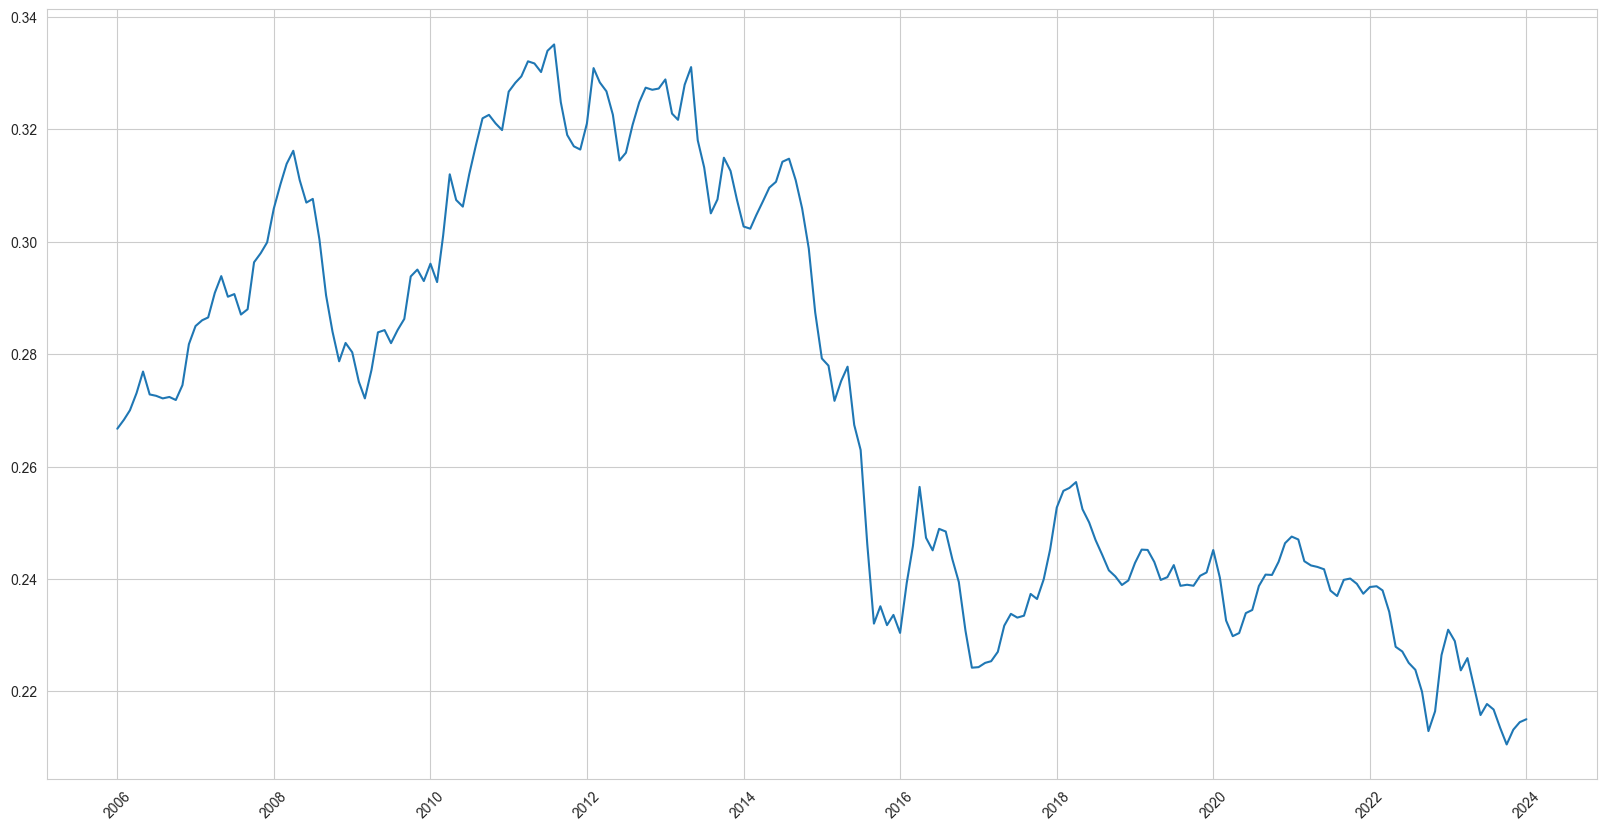

In [21]:
# plot the data with matplotlib
import matplotlib.pyplot as plt
df_with_average['Date'] = pd.to_datetime(df_with_average['Date'])
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.plot(df_with_average['Date'],df_with_average['Price'])
plt.show()